In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [154]:
dftr = pd.read_csv('train.csv') 
dftt = pd.read_csv('test.csv')

dftr = dftr.drop(['date_time'], axis=1)
date_time = dftt['date_time'].to_csv('date_time.csv')

EXPLORATORY DATA ANALYSIS

In [54]:
dftr.corr().style.background_gradient(cmap='BuPu')

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
deg_C,1.000000,-0.668002,0.445162,0.017513,0.133167,-0.145437,0.308202,-0.050567,-0.007503,0.109757,-0.205984
relative_humidity,-0.668002,1.000000,0.249013,0.093130,-0.035152,-0.102146,0.027002,0.126466,0.016589,-0.022895,0.178608
absolute_humidity,0.445162,0.249013,1.000000,0.105977,0.236894,-0.485445,0.567376,0.124945,-0.013756,0.186293,-0.101911
sensor_1,0.017513,0.093130,0.105977,1.000000,0.811898,-0.592233,0.643191,0.860849,0.857215,0.842534,0.643044
sensor_2,0.133167,-0.035152,0.236894,0.811898,1.000000,-0.819334,0.812454,0.863464,0.821025,0.964440,0.604795
sensor_3,-0.145437,-0.102146,-0.485445,-0.592233,-0.819334,1.000000,-0.741439,-0.706006,-0.547567,-0.735545,-0.427622
sensor_4,0.308202,0.027002,0.567376,0.643191,0.812454,-0.741439,1.000000,0.641120,0.571412,0.783750,0.235662
sensor_5,-0.050567,0.126466,0.124945,0.860849,0.863464,-0.706006,0.641120,1.000000,0.834501,0.877662,0.708270
target_carbon_monoxide,-0.007503,0.016589,-0.013756,0.857215,0.821025,-0.547567,0.571412,0.834501,1.000000,0.881884,0.806099
target_benzene,0.109757,-0.022895,0.186293,0.842534,0.964440,-0.735545,0.783750,0.877662,0.881884,1.000000,0.664235


In [55]:
print(dftr.isnull().sum())
print(dftt.isnull().sum())

deg_C                     0
relative_humidity         0
absolute_humidity         0
sensor_1                  0
sensor_2                  0
sensor_3                  0
sensor_4                  0
sensor_5                  0
target_carbon_monoxide    0
target_benzene            0
target_nitrogen_oxides    0
dtype: int64
deg_C                0
relative_humidity    0
absolute_humidity    0
sensor_1             0
sensor_2             0
sensor_3             0
sensor_4             0
sensor_5             0
dtype: int64


In [56]:
dftr.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
count,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000
mean,20.878034,47.561004,1.110309,1091.572100,938.064970,883.903305,1513.238349,998.335565,2.086219,10.237083,204.066784
std,7.937917,17.398731,0.398950,218.537554,281.978988,310.456355,350.180310,381.537695,1.447109,7.694426,193.927723
min,1.300000,8.900000,0.198800,620.300000,364.000000,310.600000,552.900000,242.700000,0.100000,0.100000,1.900000
25%,14.900000,33.700000,0.855900,930.250000,734.900000,681.050000,1320.350000,722.850000,1.000000,4.500000,76.450000
50%,20.700000,47.300000,1.083500,1060.500000,914.200000,827.800000,1513.100000,928.700000,1.700000,8.500000,141.000000
75%,25.800000,60.800000,1.404150,1215.800000,1124.100000,1008.850000,1720.400000,1224.700000,2.800000,14.200000,260.000000
max,46.100000,90.800000,2.231000,2088.300000,2302.600000,2567.400000,2913.800000,2594.600000,12.500000,63.700000,1472.300000


In [57]:
import scipy.stats as stat
import pylab

def plot_data(df, feature):
    
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    plt.title(feature)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [58]:
col = dftr.columns.values

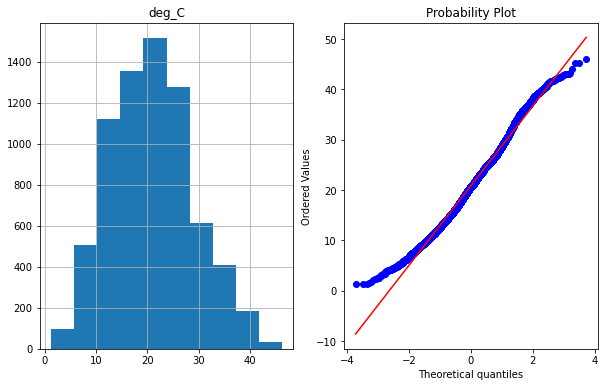

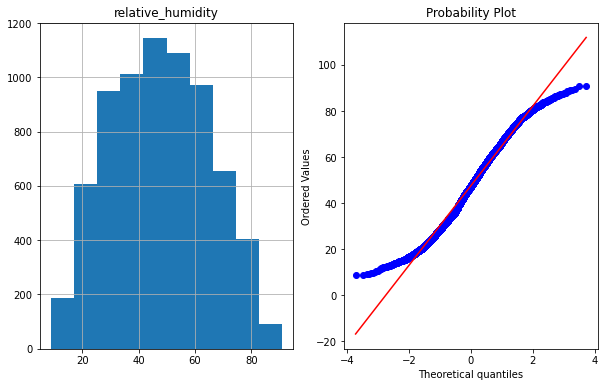

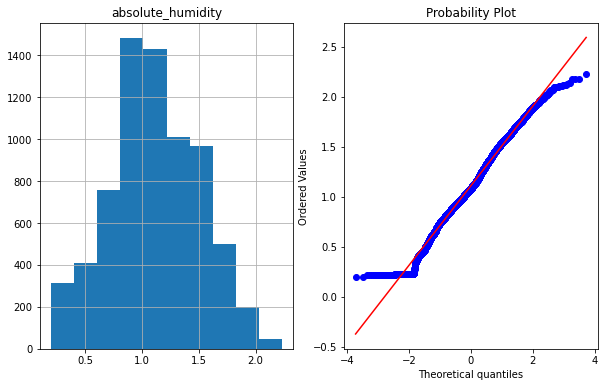

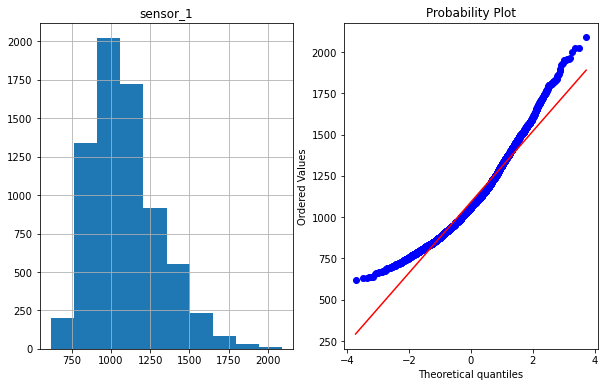

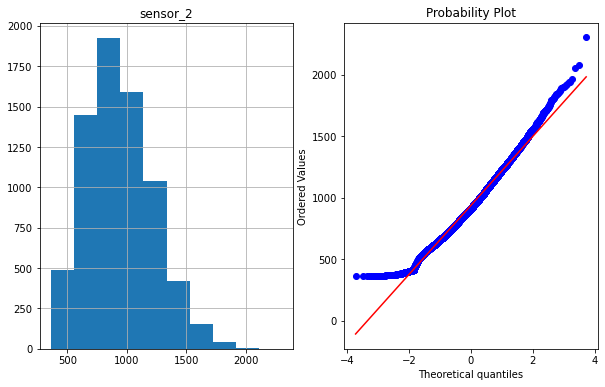

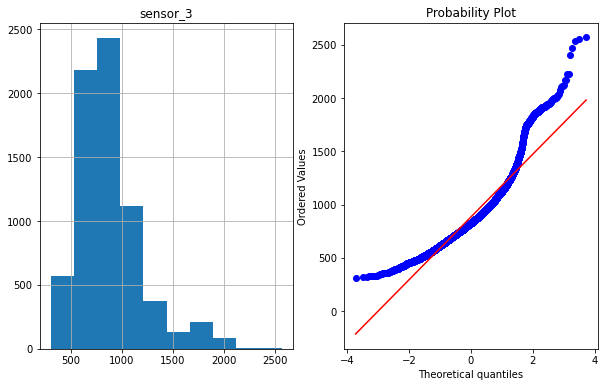

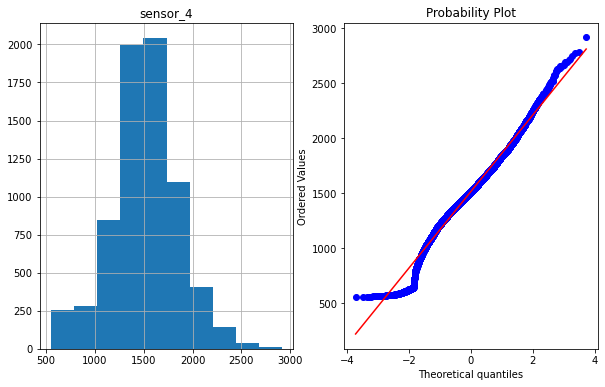

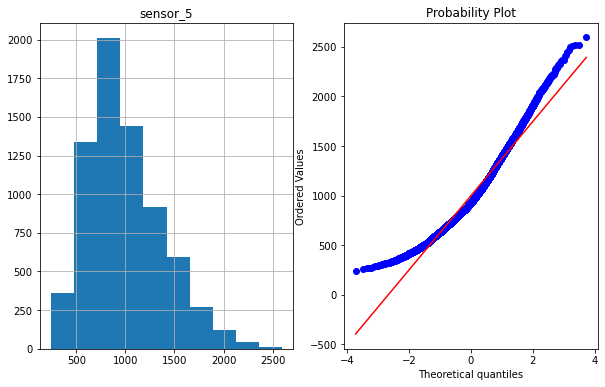

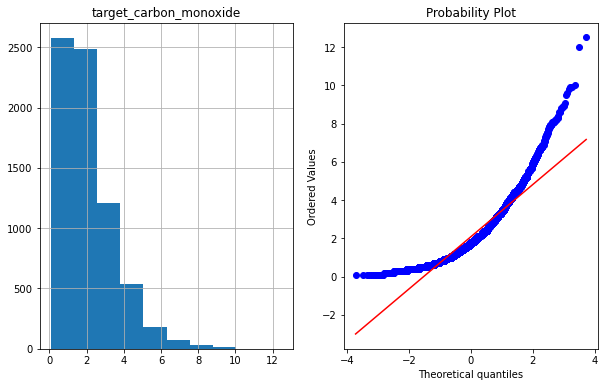

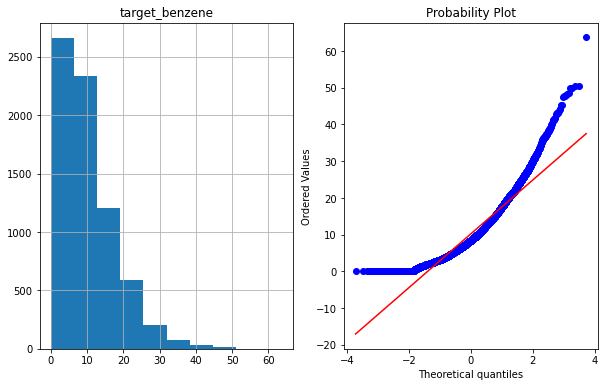

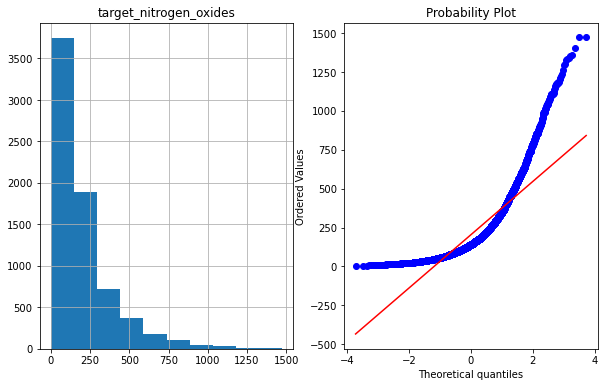

In [59]:
for i in col:
    plot_data(dftr, i)

FEATURE ENGINEERING

In [60]:
features = ['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5']
X = dftr[features]
target_features = ['target_carbon_monoxide', 'target_benzene',
       'target_nitrogen_oxides']
y = dftr[target_features]

In [61]:
y['target_carbon_monoxide'] = np.log(y['target_carbon_monoxide'])
y['target_benzene'] = np.log(y['target_benzene'])
y['target_nitrogen_oxides'] = np.log(y['target_nitrogen_oxides'])

<ipython-input-61-4fc398dc428a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['target_carbon_monoxide'] = np.log(y['target_carbon_monoxide'])
<ipython-input-61-4fc398dc428a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['target_benzene'] = np.log(y['target_benzene'])
<ipython-input-61-4fc398dc428a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [63]:
X = pd.DataFrame(X, columns = features)

In [67]:
# X.to_csv('X_train.csv')

In [69]:
# y.to_csv('y_train.csv')

In [70]:
X_test = scaler.transform(dftt)

In [72]:
X_test = pd.DataFrame(X_test, columns = features)

In [74]:
#X_test.to_csv('X_test.csv')

MODEL TRAINING

In [94]:
reg11 = RandomForestRegressor()
reg22 = RandomForestRegressor()
reg33 = RandomForestRegressor()
reg2 = RandomForestRegressor()
reg3 = RandomForestRegressor()
reg4 = RandomForestRegressor()

In [95]:
X_train = pd.read_csv('X_train.csv')
X_train = X_train.drop(['Unnamed: 0'], axis=1)

In [96]:
X_test = pd.read_csv('X_test.csv')
X_test = X_test.drop(['Unnamed: 0'], axis=1)

In [97]:
y_train = pd.read_csv('y_train.csv')
y_train = y_train.drop(['Unnamed: 0'], axis=1)

In [98]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,-0.979927,-0.089726,-0.883653,1.352851,0.531052,0.554374,0.655599,0.773410,0.916291,2.484907,5.122177
1,-0.967329,-0.129961,-0.964621,0.858164,-0.176852,1.010186,-0.180886,0.032933,0.741937,2.292535,4.594109
2,-1.042921,0.496565,-0.902705,1.099787,-0.030022,0.567903,0.208084,0.311038,0.788457,2.219203,4.844974
3,-1.244499,0.852938,-0.811208,1.049907,-0.032150,0.705452,0.066432,0.694251,0.788457,2.272126,5.177279
4,-1.131111,0.657508,-0.805944,0.825673,-0.302757,0.956713,-0.279128,0.350880,0.405465,1.856298,4.802380
...,...,...,...,...,...,...,...,...,...,...,...
7106,-1.471275,-0.894439,-1.812908,-0.416764,-0.449941,-0.035123,-1.725628,-0.230231,0.262364,1.629241,5.252797
7107,-1.483873,-0.825463,-1.839228,-0.315172,-0.525129,0.218071,-1.714490,-0.248841,0.336472,1.757858,5.399519
7108,-1.420880,-0.744992,-1.702861,-0.215869,-0.605637,-0.070879,-1.782174,0.421389,0.470004,1.648659,5.426711
7109,-1.622458,-0.394367,-1.759263,-0.635048,-0.873052,0.079233,-1.702781,0.545108,0.405465,1.526056,5.297317


In [99]:
dftr.columns.values

array(['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene',
       'target_nitrogen_oxides'], dtype=object)

In [100]:
col2_x = ['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
        'target_benzene',
       'target_nitrogen_oxides']
col2_y = ['target_carbon_monoxide']

In [101]:
col3_x = ['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
        'target_carbon_monoxide',
       'target_nitrogen_oxides']
col3_y = ['target_benzene']

In [102]:
col4_x = ['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
        'target_carbon_monoxide','target_benzene']
col4_y = ['target_nitrogen_oxides']

In [103]:
X_train_2 = train_data[col2_x]
y_train_2 = train_data[col2_y]

X_train_3 = train_data[col3_x]
y_train_3 = train_data[col3_y]

X_train_4 = train_data[col4_x]
y_train_4 = train_data[col4_y]

In [104]:
reg11.fit(X_train, y_train.iloc[: ,0:1])
reg22.fit(X_train, y_train.iloc[: ,1:2])
reg33.fit(X_train, y_train.iloc[: ,2:])
reg2.fit(X_train_2, y_train_2)
reg3.fit(X_train_3, y_train_3)
reg4.fit(X_train_4, y_train_4)

<ipython-input-104-3d0965583a12>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg11.fit(X_train, y_train.iloc[: ,0:1])
<ipython-input-104-3d0965583a12>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg22.fit(X_train, y_train.iloc[: ,1:2])
<ipython-input-104-3d0965583a12>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg33.fit(X_train, y_train.iloc[: ,2:])
<ipython-input-104-3d0965583a12>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg2.fit(X_train_2, y_train_2)
<ipython-input-104-3d0965583a12>:5: DataConversionWarning: A column-vector 

RandomForestRegressor()

In [191]:
a = reg11.predict(X_test)

In [192]:
b = reg22.predict(X_test)

In [193]:
c = reg33.predict(X_test)

In [194]:
d = []
d.append(a)
d.append(b)
d.append(c)

In [195]:
d = np.transpose(d)

In [196]:
y_test = pd.DataFrame(d, columns = y_train.columns.values)
y_test

,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,0.300364,1.511815,5.325965
1,0.696452,2.005893,5.620807
2,0.558510,1.993606,5.722455
3,0.697436,2.157924,5.891330
4,0.293372,1.936181,5.481560
...,...,...,...
2242,0.937292,2.509187,6.125669
2243,0.826504,2.312847,5.742930
2244,0.882801,2.526301,5.733992
2245,0.737585,2.406947,5.606836


In [197]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,-1.622458,-0.359879,-1.686567,0.078838,-0.682244,-0.279619,-1.808448,0.720201,0.300364,1.511815,5.325965
1,-1.987819,0.237907,-1.639189,0.722709,-0.259488,-0.631384,-1.543423,1.875869,0.696452,2.005893,5.620807
2,-1.899629,0.226412,-1.607855,0.050466,-0.213027,-0.612700,-1.631669,0.792807,0.558510,1.993606,5.722455
3,-2.000418,0.272395,-1.606852,0.220243,-0.077547,-0.509941,-1.434329,0.746150,0.697436,2.157924,5.891330
4,-2.063411,0.571289,-1.617631,-0.316545,-0.353118,-0.039955,-1.559987,0.377353,0.293372,1.936181,5.481560
...,...,...,...,...,...,...,...,...,...,...,...
2242,0.292536,-1.084121,-0.886160,1.138227,0.304424,-1.163219,-0.397647,1.733802,0.937292,2.509187,6.125669
2243,0.456319,-1.440494,-0.998713,0.646286,0.060417,-0.862672,-0.820031,0.709454,0.826504,2.312847,5.742930
2244,0.720890,-1.641672,-1.177445,0.439900,0.405502,-1.002154,-0.742065,0.216939,0.882801,2.526301,5.733992
2245,1.035857,-2.003793,-1.495051,-0.175598,0.251579,-0.585964,-1.437756,-0.497589,0.737585,2.406947,5.606836


In [198]:
X_test_2 = test_data[col2_x]
y_test_2 = test_data[col2_y]

X_test_3 = test_data[col3_x]
y_test_3 = test_data[col3_y]

X_test_4 = test_data[col4_x]
y_test_4 = test_data[col4_y]



In [199]:
aa = np.exp(reg2.predict(X_test_2))

In [200]:
bb = np.exp(reg3.predict(X_test_3))

In [201]:
cc = np.exp(reg4.predict(X_test_4))

In [202]:
dd = []
dd.append(aa)
dd.append(bb)
dd.append(cc)

In [203]:
dd = np.transpose(dd)

In [204]:
date_time = pd.read_csv('date_time.csv')
date_time = date_time.drop('Unnamed: 0' , axis=1)


In [211]:
d = []
d.append(np.exp(a))
d.append(np.exp(b))
d.append(np.exp(c))
d = np.transpose(d)
y_test = pd.DataFrame(d, columns = y_train.columns.values)
y_test

,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,1.350350,4.534953,205.606684
1,2.006620,7.432730,276.112098
2,1.748067,7.341959,305.654496
3,2.008595,8.653159,361.886337
4,1.340942,6.932224,240.221072
...,...,...,...
2242,2.553058,12.294931,457.450868
2243,2.285316,10.103145,311.977038
2244,2.417662,12.507162,309.200996
2245,2.090880,11.100016,272.281405


In [208]:
ans = pd.DataFrame(dd, columns = y_train.columns.values)
ans = pd.concat([date_time , ans], axis=1)
ans.to_csv('ans1.csv')

In [212]:
y_test = pd.concat([date_time , y_test], axis=1)
y_test.set_index('date_time',inplace= True)
# y_test = y_test.drop('Unnamed: 0' , axis=1)
y_test

,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
date_time,,,
2011-01-01 00:00:00,1.350350,4.534953,205.606684
2011-01-01 01:00:00,2.006620,7.432730,276.112098
2011-01-01 02:00:00,1.748067,7.341959,305.654496
2011-01-01 03:00:00,2.008595,8.653159,361.886337
2011-01-01 04:00:00,1.340942,6.932224,240.221072
...,...,...,...
2011-04-04 10:00:00,2.553058,12.294931,457.450868
2011-04-04 11:00:00,2.285316,10.103145,311.977038
2011-04-04 12:00:00,2.417662,12.507162,309.200996


In [213]:
ans.set_index('date_time',inplace= True)

In [214]:
ans

,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
date_time,,,
2011-01-01 00:00:00,1.062086,4.502084,199.810757
2011-01-01 01:00:00,1.442961,7.211636,312.150360
2011-01-01 02:00:00,1.440875,7.216183,302.032409
2011-01-01 03:00:00,1.961874,8.636651,381.075698
2011-01-01 04:00:00,1.240794,6.719515,271.638731
...,...,...,...
2011-04-04 10:00:00,2.903878,12.075309,341.931313
2011-04-04 11:00:00,2.344433,10.312770,304.364134
2011-04-04 12:00:00,2.496380,12.422245,338.498287


In [170]:
ans = ans.drop('Unnamed: 0', axis=1)

In [215]:
ans.to_csv('subs1.csv')

In [216]:
y_test.to_csv('subs2.csv')